# <u> Part II - Prosper Loan Data Explanation </u>
## by Nicole Wambui

## <u> Investigation Overview </u>

The main goal with this investigation is to get a deeper look at borrower metrics and find out how these affect the loan amounts they receive as well as any delinquent loan payment amounts they might have. The main question I am seeking to answer is: 

> _**"How important is income verifiability as a risk factor in lending?"**_



## <u> Dataset Overview </u>

The original dataset was information on 113,937 loans including information about different borrower metrics. However, I will be using a cleaned version of the dataset that only has 104,982 observations. I will also be focusing on the following variables of the dataset:
- `IncomeVerifiable`
- `OriginalLoanAmounts`
- `AmountDelinquent`
- `ListingCategory (numeric)`
- `IncomeRange`

_There is a link to the explanation of the `ListingCategory (numeric)`  values provided [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit)._

In [31]:
#code below is simply for table formating

In [1]:
%%HTML
<style type='text/css'>
    table.dataframe td, table.datafram th {
        border-style: solid;
        border: 1px solid lightgrey;
    }
</style>

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("ProsperLoanDataCleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104982 entries, 0 to 104981
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 104982 non-null  int64 
 1   ListingCategory (numeric)  104982 non-null  int64 
 2   Occupation                 104982 non-null  object
 3   EmploymentStatus           104982 non-null  object
 4   IsBorrowerHomeowner        104982 non-null  bool  
 5   CurrentDelinquencies       104982 non-null  int64 
 6   AmountDelinquent           104982 non-null  int64 
 7   IncomeRange                104982 non-null  object
 8   IncomeVerifiable           104982 non-null  bool  
 9   StatedMonthlyIncome        104982 non-null  int64 
 10  LoanCurrentDaysDelinquent  104982 non-null  int64 
 11  LoanOriginalAmount         104982 non-null  int64 
 12  MonthlyLoanPayment         104982 non-null  int64 
 13  Recommendations            104982 non-null  

In [5]:
#convert listing category and income range into categories for easier visualisation
income_class = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+", "Not employed", "Not displayed"]
incomeclasses = pd.api.types.CategoricalDtype(ordered = True, categories = income_class)
df["IncomeRange"] = df["IncomeRange"].astype(incomeclasses);

list_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
listclasses = pd.api.types.CategoricalDtype(ordered = True, categories = list_class)
df["ListingCategory (numeric)"] = df["ListingCategory (numeric)"].astype(listclasses);

employment_class = ["Employed", "Full-time", "Not employed", "Other", "Part-time", "Retired", "Self-employed"]
employmentclasses = pd.api.types.CategoricalDtype(ordered = True, categories = employment_class)
df["EmploymentStatus"] = df["EmploymentStatus"].astype(employmentclasses);

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104982 entries, 0 to 104981
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Unnamed: 0                 104982 non-null  int64   
 1   ListingCategory (numeric)  104982 non-null  category
 2   Occupation                 104982 non-null  object  
 3   EmploymentStatus           104982 non-null  category
 4   IsBorrowerHomeowner        104982 non-null  bool    
 5   CurrentDelinquencies       104982 non-null  int64   
 6   AmountDelinquent           104982 non-null  int64   
 7   IncomeRange                104982 non-null  category
 8   IncomeVerifiable           104982 non-null  bool    
 9   StatedMonthlyIncome        104982 non-null  int64   
 10  LoanCurrentDaysDelinquent  104982 non-null  int64   
 11  LoanOriginalAmount         104982 non-null  int64   
 12  MonthlyLoanPayment         104982 non-null  int64   
 13  Recommendation

## 1. Income Range and Loan Amounts

Given that we are mostly interested in investigating the importance of income verifiability as a risk factor, let's first figure out:

_**How does the income range affect the loan amount disbursed to borrowers?**_

In [7]:
#we'll use a side by side violin and box plot because we are looking at a categorical and numeric variable
#create defined codes to reduce repetition
def plot(x,y):
    plt.figure(figsize = [x,y]) #create a code to automate plt.figure since we'll use it a lot

def xt(i): #define the xticks code
    plt.xticks(rotation = i)
    
def vplot(data, x, y): #define the violinplot code
    sns.violinplot(data = data, x = x, y = y, color = my_colour, inner = "quartile");

def bplot(data, x, y): #define the boxplot code
    sns.boxplot(data = data, x = x, y = y, color = my_colour);

def pltlabels(j, k, l): #define the plot labels' code
    plt.title(j);
    plt.xlabel(k)
    plt.ylabel(l);

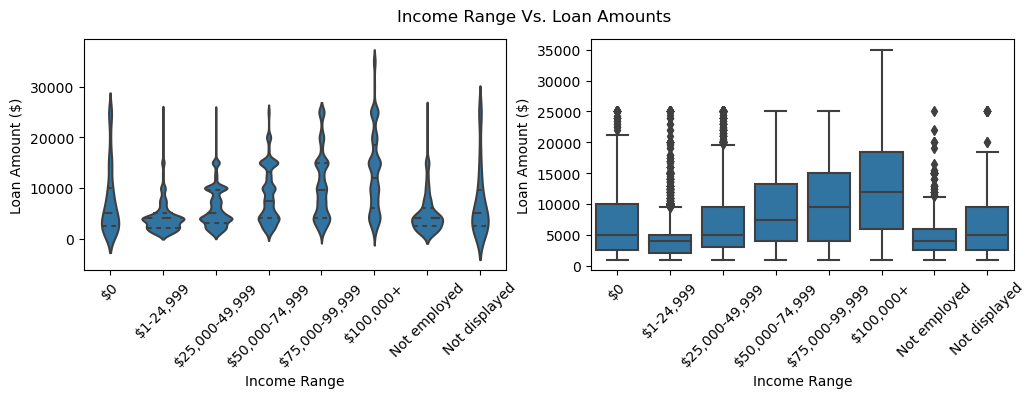

In [8]:
my_colour = sns.color_palette(palette = None, as_cmap = True)[0] # creat a variable to set the plot colour to blue.

plot(12, 3)

plt.subplot(1,2,1)
vplot(df, "IncomeRange", "LoanOriginalAmount")
xt(45);
pltlabels("", "Income Range", "Loan Amount ($)" )
plt.suptitle("Income Range Vs. Loan Amounts");

plt.subplot(1,2,2)
bplot(df, "IncomeRange", "LoanOriginalAmount")
xt(45);
pltlabels("", "Income Range", "Loan Amount ($)" )

> **Observations:**
>
> - We can clearly see that as the income range increases, the loan amount increases as well. People in the income bracket of `$100,000+` also receive the highest loan amounts of upto $35,000.
>
>
> - We can also see that borrowers in the `$1 - $24,999` income bracket receive the lowest loan amounts, even compared to people with a listed income of `$0`, those who are unemployed and those whose income is not displayed.

## 2. Income Range, Loan Amounts and Income Verifiability

Given that we can see that the declared income amount affects the loan amounts a borrower can receive, it is not too far-fetched to hypothesise that some borrowers may not be truthful about their income. Bearing in mind that some people may not have formal employment, and therefore a means of verifying their income, this is what we need to look at next:

_**How does income verifiability affect the loan amount disbursed to borrowers based on their declared income range?**_

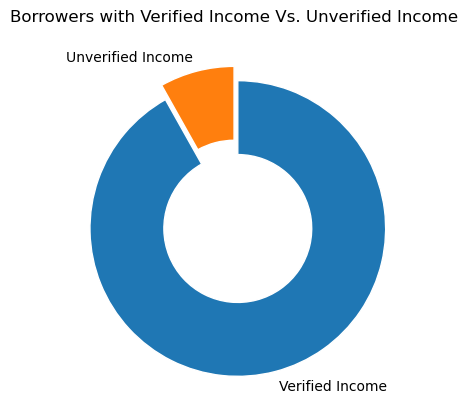

In [10]:
#plot a pie chart to demonstrate the distribution of borrowers with verified nd inverified income in the dataset.
labels_income = df.IncomeVerifiable.value_counts() #create a series that will be used to plot the pie chart
plt.pie(labels_income, explode = [0.1, 0], labels = ["Verified Income", "Unverified Income"], startangle = 90, counterclock= False, wedgeprops = {'width':0.5, 'linewidth':1.0,'edgecolor': 'white'});
plt.title("Borrowers with Verified Income Vs. Unverified Income");

- The donut chart above gives us a rough idea of the proportion of borrowers with verified and unverified income within the dataset. We can see that a majority of borrowers have verified income.

In [12]:
#since we are working with 2 categorical variables and one numeric variable we'll use a barplot
#create a defined function of a barplot since we are going to be plotting some multivariate charts moving forward

def bar(data, x, y, hue, title):
    sns.barplot(data = data, x = x, y = y, hue = hue);
    plt.legend(title = title);

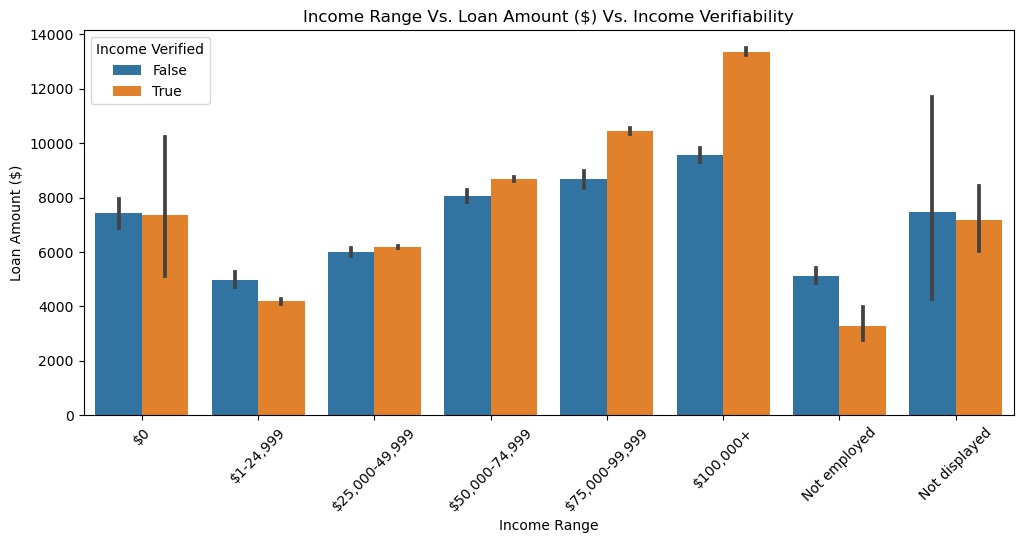

In [16]:
plot(12, 5)
bar(df, "IncomeRange", "LoanOriginalAmount", "IncomeVerifiable", "Income Verified")
xt(45)
pltlabels("", "Income Range", "Loan Amount ($)")
plt.title("Income Range Vs. Loan Amount ($) Vs. Income Verifiability");

> **Observations:**
>
> - Borrowers with unverified income only receive higher amounts than those with verified income in the `$0`, `$1-24,999`, _unemployed_ and _not displayed_ categories. This could indicate that people in the `$1-24,999` category with unverified income probably do not have formal employment or a means to verify their earnings.
>
>
> - For borrowers with unverified income in the `$0`, unemployed and not displayed categories, it is unclear how they managed to secure higher loan amounts than those with veifiable income. It could also indicate that people with verifiable income are less likely to fall under these income categories.
>
>
> - It's also interesting to note that there were people with unverified income that indicate they were in the `$100,000+` category. These borrowers received much lower amounts their counterparts in the same bracket with verifiable income in comparison with all the other categories. This could be because the loan limits for this category are much higher and present a greater risk for the company.

## 3. Income Range, Delinquent Loan Amounts and Income Verifiability

Given that we have seen the income range directly affect the loan amount a borrower can receive, the next thing we would like to investigate is:

_**How does income verifiability affect the delinquent loan amounts across the income ranges?**_

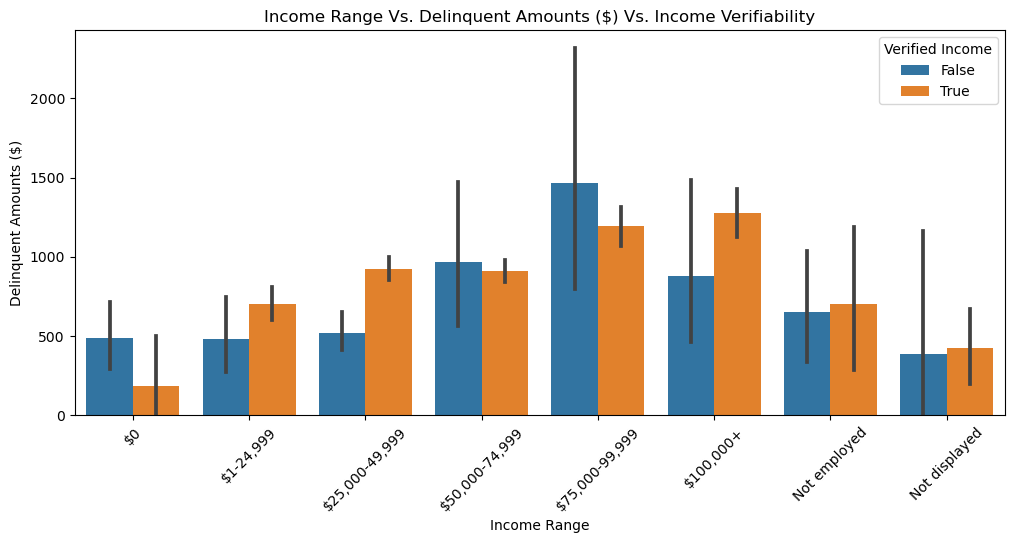

In [18]:
plot(12, 5)
bar(df, "IncomeRange", "AmountDelinquent", "IncomeVerifiable", "Verified Income")
plt.xticks(rotation = 45)
pltlabels("", "Income Range", "Delinquent Amounts ($)")
plt.title("Income Range Vs. Delinquent Amounts ($) Vs. Income Verifiability");

> **Observations:**
>
> - For 3 different income ranges, i.e. `$0`,`$50,000-74,999` and `$75,000-99,999`, borrowers with unverifiable income had higher delinquent loan amounts than those with verifiable income. While this would make sense for the lower income brackets, it's rather difficult to understand how a borrower can claim to earn between 50,000 and 100,000 dollars and be able to take out a loan without verifying their income.
>
>
> - Based on the observations on the previous slide, the differences in loan limits on different income ranges ( `$1-24,999`, _unemployed_ and _not diplsayed_) make sense because people with unverifiable income have much lower delinquent loan amounts than those with verifiable income. However, they had significantly more delinquent loan amounts for listing category `0` and still received minimally higher loan amounts than those with verifiable income. It should be noted that the data can be slightly misleading given that the actual delinquent amounts are quite low, with the the highest delinquent amount being slightly upwards of `$2,000` dollars.

## 4. Listing Category and Loan Amounts

While we focused on income range in the previous section, another important factor that is considered before a loan is disbursed to a borrower is their reason for taking the loan out in the first place. In this dataset, this variable is termed as `ListingCategory (numeric)`. The question we'll try to figure out here is:

_**How does the listing category affect the loan amounts received by borrowers?**_

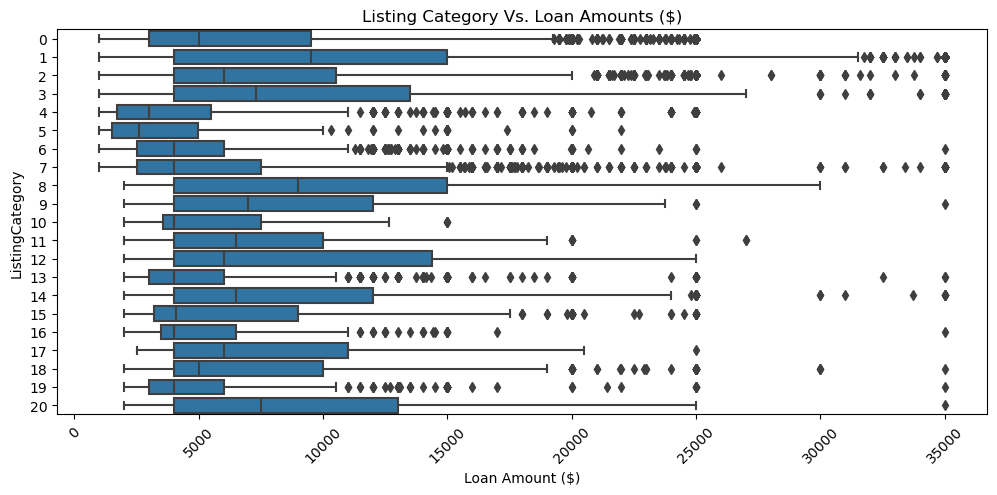

In [19]:
plot(12, 5)
bplot(df, "LoanOriginalAmount", "ListingCategory (numeric)")
xt(45)
pltlabels("Listing Category Vs. Loan Amounts ($)", "Loan Amount ($)", "ListingCategory")

>**Observations:**
>
> - Listing category `1`(_debt consolidation_) and `8` (_baby and adoption_) and `12`(_green loans_) respectively receive the highest loan amounts. It's quite interesting that debt consolidation would be the number 1 category receiveing the highest loan amounts, given that it would seem people with preexisting debt may present higher risk factors.
>
> - Listing category `4`(_personal Loan_) and `5` (_student use)_ receive the lowest loan amounts. This could either be attributed to lower numbers of borrowers who need to take such loans, or other risk factors associated with borrowers who are likely to take out these kinds of loans. For example, students are in school and not likely to be working for some time to come. These loans may take a while to be paid back, whereas someone taking out a loan for personal use may already be struggling financially.

## 5. Listing Category, Loan Amounts and Income Verifiability

Our primary interest from the beginning has been figuring out how income verifiability presents as a risk factor in determining a borrowers creditworthiness. In this section, we are primarily concerned with figuring this out:

_**How does income verifiability affect the loan amounts disbursed for the different the listing categories?**_

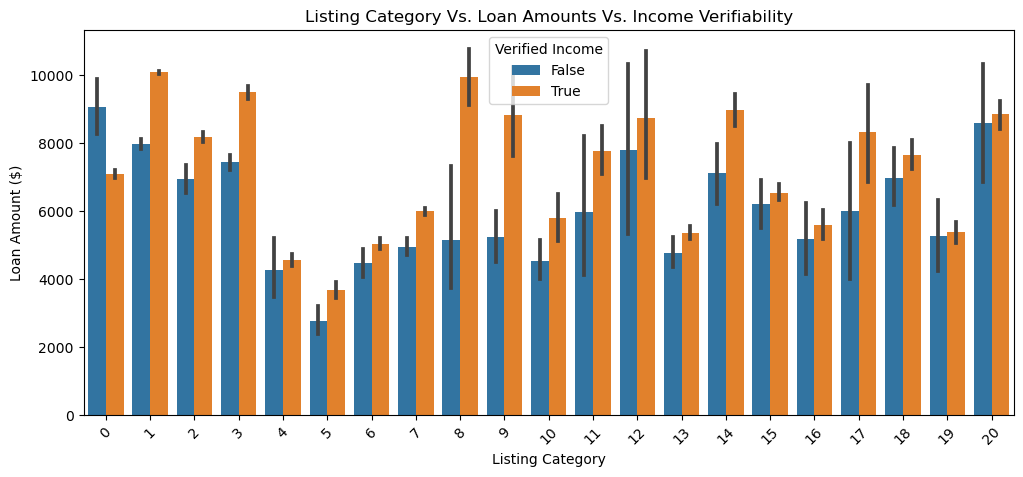

In [22]:
plot(12, 5)
bar(df, "ListingCategory (numeric)", "LoanOriginalAmount", "IncomeVerifiable", "Verified Income");
xt(45)
pltlabels("Listing Category Vs. Loan Amounts Vs. Income Verifiability", "Listing Category", "Loan Amount ($)" )

> **Observations:**
>
> - Borrowers with verifiable income typically receive higher loan limits across all the listing categories expect one. The categories where verifiable income seems to make the most impact are categories `8` (_baby and adoption_) and `9`(_boat_). These two categories receive some of the highest loan amounts and it could be due to the expenses involved. One insight could be that if someone is taking out a loan to help out with baby or adoption related expenses, as well as purchasing a boat, you would need to indicate having a steady source of income to be successful in those endeavours. It could also be that people with unverifiable income would typically not be making such purchases.
>
>
> - Listing category `0` (_not available_) is the only category where people with unverifiable income receive higher loan limits than those with veifiable income. This particular group also appears to receive some of the highest loan limits across the board. It's quite interesting that a borrower would be able to take out a loan with unverified income and not state the reason for the loan.

## 6. Listing Category, Delinquent Loan Amounts and Income Verifiability

In the previous slide, we noticed that borrowers who have no verifiable income and do not state the reason for their loan still receive some of the highest loan amounts. In this section, we are primarily interested in figuring out:

_**How does income verifiability affect delinquent loan amounts across the listing categories?**_

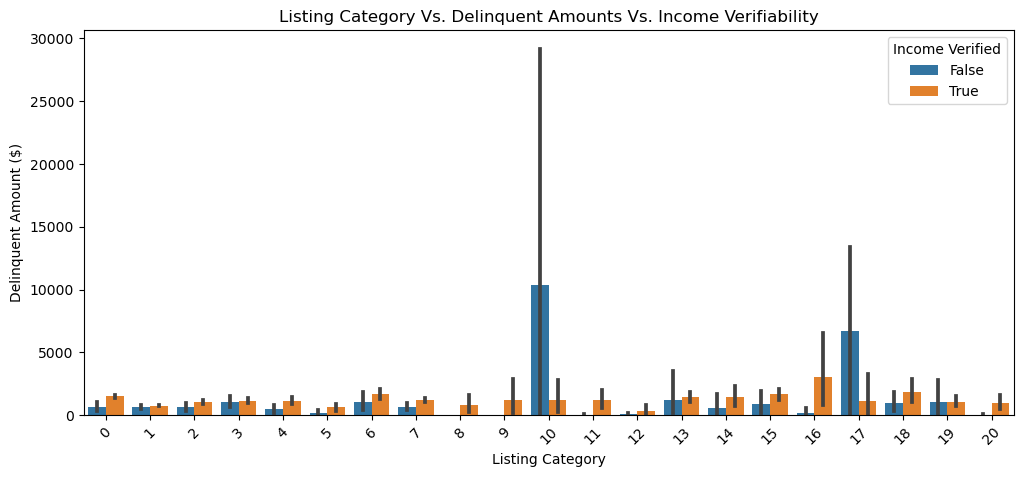

In [24]:
plot(12, 5)
bar(df, "ListingCategory (numeric)", "AmountDelinquent", "IncomeVerifiable", "Income Verified")
xt(45)
pltlabels("Listing Category Vs. Delinquent Amounts Vs. Income Verifiability", "Listing Category", "Delinquent Amount ($)")

> **Observations:**
>
> - Interestingly, people with unverifiable income have much lower amount of delinquent payments across the board. This could also be due to receiving lower limits. 
>
>
> - Two listing categories stand out with having delinquent amounts around `$10,000`, which are the highest in the dataset. For category `10`(_cosmetic procedure_) and `17`(_RV_), the borrowers with delinquent payments do not have verifiable income. It's intereting that these two categories stand out because in the previous section, people with unverifiable income still received high loan amounts for these listing categories.
>
>
> - Another interesting point of note is that in category `20`(_wedding loans_) the loan amounts for borrowers with both verified and unverfied income were almost simliar and at around `$9,000`. It appears that pepole with verifiable income have higher amounts of delinquent payments here despite receiving the same loan amounts.

## <u> Conclusion </u>

Across the different metrics investigated like _Income Range_ and _Listing Category_, borrowers with unverifiable income were sometimes able to secure higher loan limits than those with verifiable income. Additonally, borrowers with verifiable income had higher delinquent loan amounts than those with unverifiable income. This holds true even for categories such as wedding loans, where both groups received similar loan amounts.

Generally, _income range_ appears to be a better risk factor than _income verifiablity_ given that higher income ranges tended to receive higher loan amounts, and loan limits as well.

**Points to Consider:**
- The proportion of borrowers with unverifiable income was much smaller than those with verifiable income. Rather than concluding that income verifiability is a lower risk factor, it could be that people without verifiable income are much less likely to get their loan applications approved in the first place.

**Further Investigation:**
- The comparison between income range, delinquent amounts and income verifiability highlighted that borrowers with unverified income claiming to earn between `$50,000-99,999` had higher loan delinquencies than their verified counterparts. It left a question as to how a borrower can claim to earn that amount of money and not verify their income. This could be an interesting point of further investigation for the money-lending company on it's verification processes.

In [ ]:
!jupyter nbconvert "Prosper Loan Data - Part II (resubmission)".ipynb --to slides --post serve --no-input --no-prompt